### Imports

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string



In [105]:
# Create a Kaggle API client
import os
os.environ['KAGGLE_USERNAME'] = 'mustabshiribnamin'
os.environ['KAGGLE_KEY'] = '0eff4183442e547cfe97d8be3e922d42' 
import kaggle as kg
kg.api.dataset_download_files(dataset = "bhavikjikadara/fake-news-detection", path='dataset', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection


### View Data

In [106]:
true_df = pd.read_csv('dataset/true.csv')
fake_df = pd.read_csv('dataset/fake.csv')

In [107]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [108]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [109]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [110]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


### Data Preprocessing

In [111]:
true_df.duplicated().sum()

206

In [112]:
true_df.drop_duplicates(inplace=True)

In [113]:
fake_df.duplicated().sum()

3

In [114]:
fake_df.drop_duplicates(inplace=True)

In [115]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [116]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [117]:
# labeling the true and false state
true_df['label'] = 0
fake_df['label'] = 1

In [118]:
# concating true and fake data
df = pd.concat([fake_df, true_df], ignore_index=True)
# shuffling the rows of the DataFrame and resetting the index
df = df.sample(frac=1).reset_index(drop=True)

In [119]:
#replace underscores and making title format
df.columns = df.columns.str.replace('_', ' ').str.title()

In [120]:
df.head()

,Title,Text,Subject,Date,Label
0,“TROUBLING ANSWER” To Rescue Effort During Ben...,This Benghazi timeline by Rep Roskam explains ...,politics,"Jun 29, 2016",1
1,COLLEGE QB Kneed Out Of Anger Over Trump’s Rem...,He was given the option to kneel in protest be...,politics,"Oct 14, 2017",1
2,DONALD TRUMP: What I’ll Do My First Day In Off...,Donald Trump answers the question of what he l...,politics,"Jun 11, 2016",1
3,OBAMA USES HIROSHIMA VISIT To Blame Religion F...,What a unique way for a President of the Unite...,politics,"May 27, 2016",1
4,The GOP Is Sharing Conference Space With PERF...,There are seldom those moments in life that se...,News,"January 17, 2016",1


In [121]:
# Clean text
stopword = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean(text):
    text = str(text).lower()
    # remove text within square brackets
    text = re.sub('\[.*?\]', '', text) 
    # remove http links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # remove html tags
    text = re.sub('<.*?>+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # remove newline chars
    text = re.sub('\n', '', text)
    # remove all word containing numbers
    text = re.sub('\w*\d\w*', '', text)
    # remove stopwords
    text = [word for word in text.split(' ') if word not in stopword]
    # applies stemming to words
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

df['Text'] = df['Text'].apply(lambda x: clean(x))
df['Title'] = df['Title'].apply(lambda x: clean(x))

In [122]:
df.head()

,Title,Text,Subject,Date,Label
0,“troubl answer” rescu effort benghazi attack e...,benghazi timelin rep roskam explain big questi...,politics,"Jun 29, 2016",1
1,colleg qb kneed anger trump’ remark nfl player...,given option kneel protest game import take st...,politics,"Oct 14, 2017",1
2,donald trump i’ll first day offic,donald trump answer question first day offic t...,politics,"Jun 11, 2016",1
3,obama use hiroshima visit blame religion wars…...,uniqu way presid unit state spend memori day w...,politics,"May 27, 2016",1
4,gop share confer space perfect metaphor repub...,seldom moment life seem poetic peopl share spa...,News,"January 17, 2016",1


### Model Training

In [123]:

# For learning setup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pickle

# Define TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the text data
X = vectorizer.fit_transform(df['Text'])

# Define target variable
y = df['Label']

# Save the TF-IDF vectorizer
with open('Models/tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


In [124]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)



0.9888118147236519

In [126]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

# Compute learning curves
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
train_sizes, train_scores_lr, test_scores_lr = learning_curve(lr, X_train, y_train, cv=cv)

# Calculate mean training and test scores
mean_train_scores_lr = np.mean(train_scores_lr, axis=1)
mean_test_scores_lr = np.mean(test_scores_lr, axis=1)

In [127]:
y_pred = lr.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Classification Report (includes precision, recall, F1-score per class)
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4278
           1       0.99      0.99      0.99      4660

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

[[4233   45]
 [  55 4605]]


In [128]:
print(accuracy)
print(precision)
print(recall)
print(f"F1 Score: {f1:.4f}")


0.9888118147236519
0.9903225806451613
0.9881974248927039
F1 Score: 0.9893


In [129]:
model_names = []
model_names.append("LR")
accuracy_values = []
accuracy_values.append(accuracy*100)

In [130]:
# Save Logistic Regression model
with open('Models/logistic_regression.pkl', 'wb') as file:
    pickle.dump(lr, file)

### Naive Bayes

In [131]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_model.score(X_test,y_test)

0.9528977399865742

In [132]:
# Compute learning curves
_, train_scores_nb, test_scores_nb = learning_curve(nb_model, X_train, y_train, cv=cv)

# Calculate mean training and test scores
mean_train_scores_nb = np.mean(train_scores_nb, axis=1)
mean_test_scores_nb = np.mean(test_scores_nb, axis=1)

In [133]:
y_pred = nb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Classification Report (includes precision, recall, F1-score per class)
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4278
           1       0.96      0.95      0.95      4660

    accuracy                           0.95      8938
   macro avg       0.95      0.95      0.95      8938
weighted avg       0.95      0.95      0.95      8938

[[4108  170]
 [ 251 4409]]


In [134]:
print(accuracy)
print(precision)
print(recall)
print(f"F1 Score: {f1:.4f}")

0.9528977399865742
0.9628739899541384
0.946137339055794
F1 Score: 0.9544


In [135]:
model_names.append("MNB")
accuracy_values.append(accuracy*100)

In [136]:
# Save Naive Bayes model
with open('Models/naive_bayes.pkl', 'wb') as file:
    pickle.dump(nb_model, file)

### Support Vector Machine (SVM)

In [137]:
from sklearn import svm

linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

linear_svm.score(X_test, y_test)

0.9953009621839337

In [138]:
_, train_scores_lsvm, test_scores_lsvm = learning_curve(linear_svm, X_train, y_train, cv=cv)

# Calculate mean training and test scores
mean_train_scores_lsvm = np.mean(train_scores_lsvm, axis=1)
mean_test_scores_lsvm = np.mean(test_scores_lsvm, axis=1)

In [139]:
y_pred = linear_svm.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Classification Report (includes precision, recall, F1-score per class)
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4278
           1       1.00      1.00      1.00      4660

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938

[[4256   22]
 [  20 4640]]


In [140]:
print(accuracy)
print(precision)
print(recall)
print(f"F1 Score: {f1:.4f}")

0.9953009621839337
0.9952809952809952
0.9957081545064378
F1 Score: 0.9955


In [141]:
model_names.append("LSVM")
accuracy_values.append(accuracy*100)

In [142]:
# Save Linear SVM model
with open('Models/linear_svm.pkl', 'wb') as file:
    pickle.dump(linear_svm, file)

In [143]:
from sklearn import svm

poly_svm = svm.SVC(kernel='poly')
poly_svm.fit(X_train, y_train)

poly_svm.score(X_test, y_test)

0.9528977399865742

In [144]:
from sklearn import svm

sigmoid_svm = svm.SVC(kernel='sigmoid')
sigmoid_svm.fit(X_train, y_train)

sigmoid_svm.score(X_test, y_test)

0.9947415529201163

### Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.score(X_test,y_test)

0.9910494517789215

In [146]:
_, train_scores_rf, test_scores_rf = learning_curve(rfc, X_train, y_train, cv=cv)

# Calculate mean training and test scores
mean_train_scores_rf = np.mean(train_scores_rf, axis=1)
mean_test_scores_rf = np.mean(test_scores_rf, axis=1)

In [147]:
y_pred = rfc.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Classification Report (includes precision, recall, F1-score per class)
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4278
           1       0.99      0.99      0.99      4660

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

[[4245   33]
 [  47 4613]]


In [148]:
print(accuracy)
print(precision)
print(recall)
print(f"F1 Score: {f1:.4f}")

0.9910494517789215
0.9928971157985363
0.9899141630901288
F1 Score: 0.9914


In [149]:
model_names.append("RF")
accuracy_values.append(accuracy*100)

In [150]:
# Save Random Forest model
with open('Models/random_forest.pkl', 'wb') as file:
    pickle.dump(rfc, file)

In [151]:
model_names.append("SRNN")
accuracy_values.append(0.942717206132879*100)
model_names.append("LSTM")
accuracy_values.append(0.9984028960817717*100)

### Result Analysis Plots

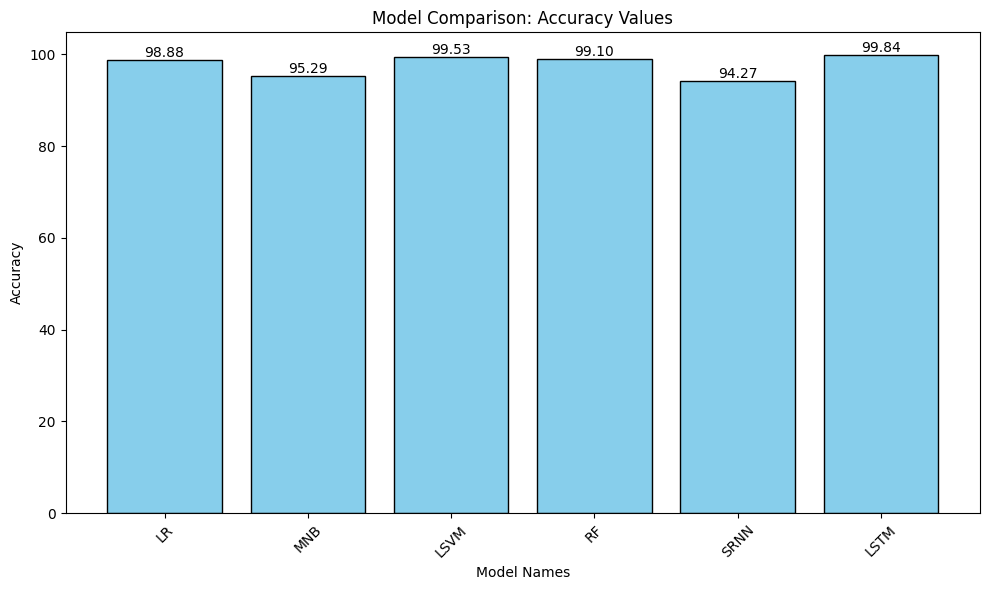

In [152]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(model_names, accuracy_values, color='skyblue', edgecolor='black')
plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Add accuracy values as text labels above the bars
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Ensure labels fit within the figure
plt.show()


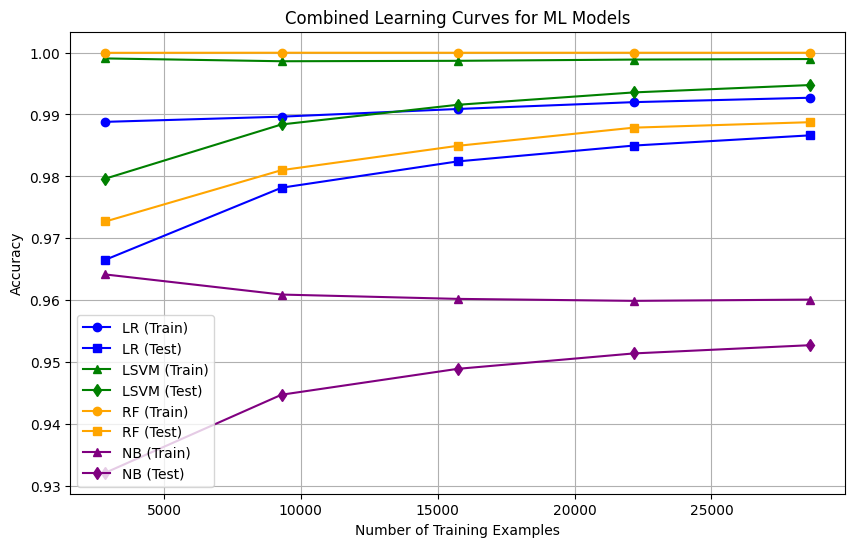

In [153]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mean_train_scores_lr, label="LR (Train)", marker='o', color='blue')
plt.plot(train_sizes, mean_test_scores_lr, label="LR (Test)", marker='s', color='blue')
plt.plot(train_sizes, mean_train_scores_lsvm, label="LSVM (Train)", marker='^', color='green')
plt.plot(train_sizes, mean_test_scores_lsvm, label="LSVM (Test)", marker='d', color='green')
plt.plot(train_sizes, mean_train_scores_rf, label="RF (Train)", marker='o', color='orange')
plt.plot(train_sizes, mean_test_scores_rf, label="RF (Test)", marker='s', color='orange')
plt.plot(train_sizes, mean_train_scores_nb, label="NB (Train)", marker='^', color='purple')
plt.plot(train_sizes, mean_test_scores_nb, label="NB (Test)", marker='d', color='purple')

plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.title("Combined Learning Curves for ML Models")
plt.legend()
plt.grid()
plt.show()